Forecasting Real Estate Price Prediction Using Linear Regression 
 Based on Geospatial Intelligence 

  
  analyzes house sale prices from King County, Washington, for homes sold between May 2014 and May 2015. The workflow began with a thorough Exploratory Data Analysis (EDA), using visualizations like histograms and heatmaps to understand feature distributions and correlations within the dataset. For the predictive modeling phase, a binary target variable, 


expensive, was engineered to classify houses as being priced above or below the median value. A Logistic Regression model was then trained on various features—such as sqft_living, bedrooms, bathrooms, and grade—to perform this classification. Upon evaluation, the model demonstrated solid performance, achieving an accuracy of approximately 80% and showing a strong ability to differentiate between "expensive" and "not expensive" properties, as confirmed by the confusion matrix and detailed classification report.

In [9]:
# Step 1: Load Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("C:\\Daily drive\\College\\sem 5\\piyush_sir_ai_&_ml\\MAIN PROJECTS\\200 marks ml\\kc_house_data.csv")
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [11]:
# Step 2: Basic Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:

print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [13]:
# Step 3: Checking Missing Values and Duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Duplicate rows: 0


In [14]:
# Step 4: Statistical Measures
print("Mean Price:", df['price'].mean())
print("Median Price:", df['price'].median())
print("Minimum Price:", df['price'].min())
print("Maximum Price:", df['price'].max())


Mean Price: 540088.1417665294
Median Price: 450000.0
Minimum Price: 75000.0
Maximum Price: 7700000.0


In [15]:
# Step 5: Visualizations

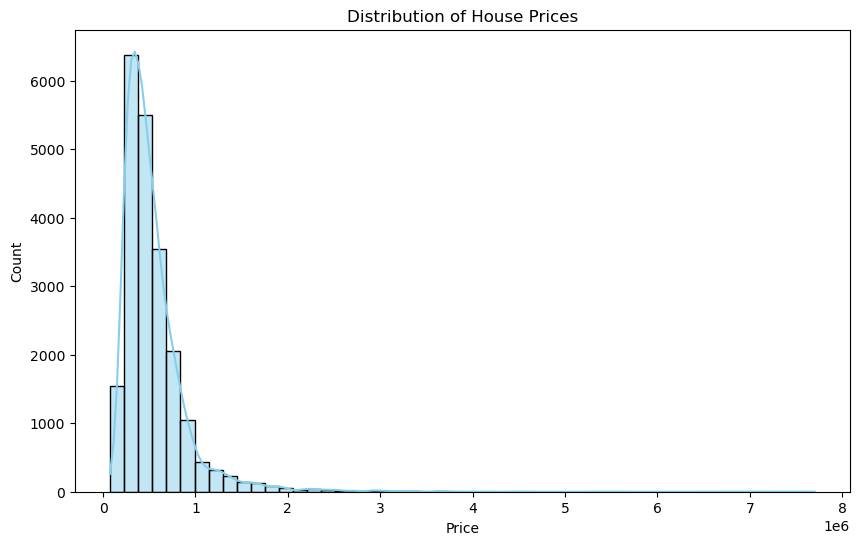

In [16]:
#histogram
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


The market predominantly consists of homes priced under $750,000, but there is a long tail of high-value properties that skews the average price upward. This suggests the median price is a more accurate measure of a typical home's value than the mean.

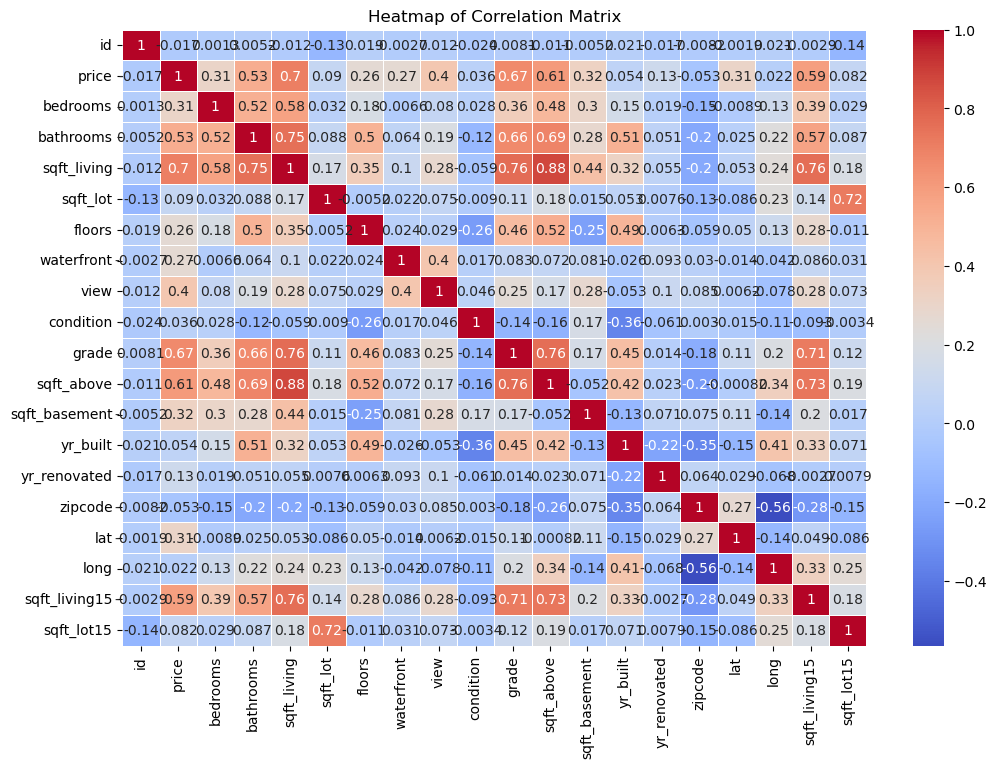

In [17]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


 House price is most strongly correlated with the living area (sqft_living), construction quality (grade), and above-ground square footage (sqft_above). This indicates that the size and quality of a house are the primary drivers of its value.

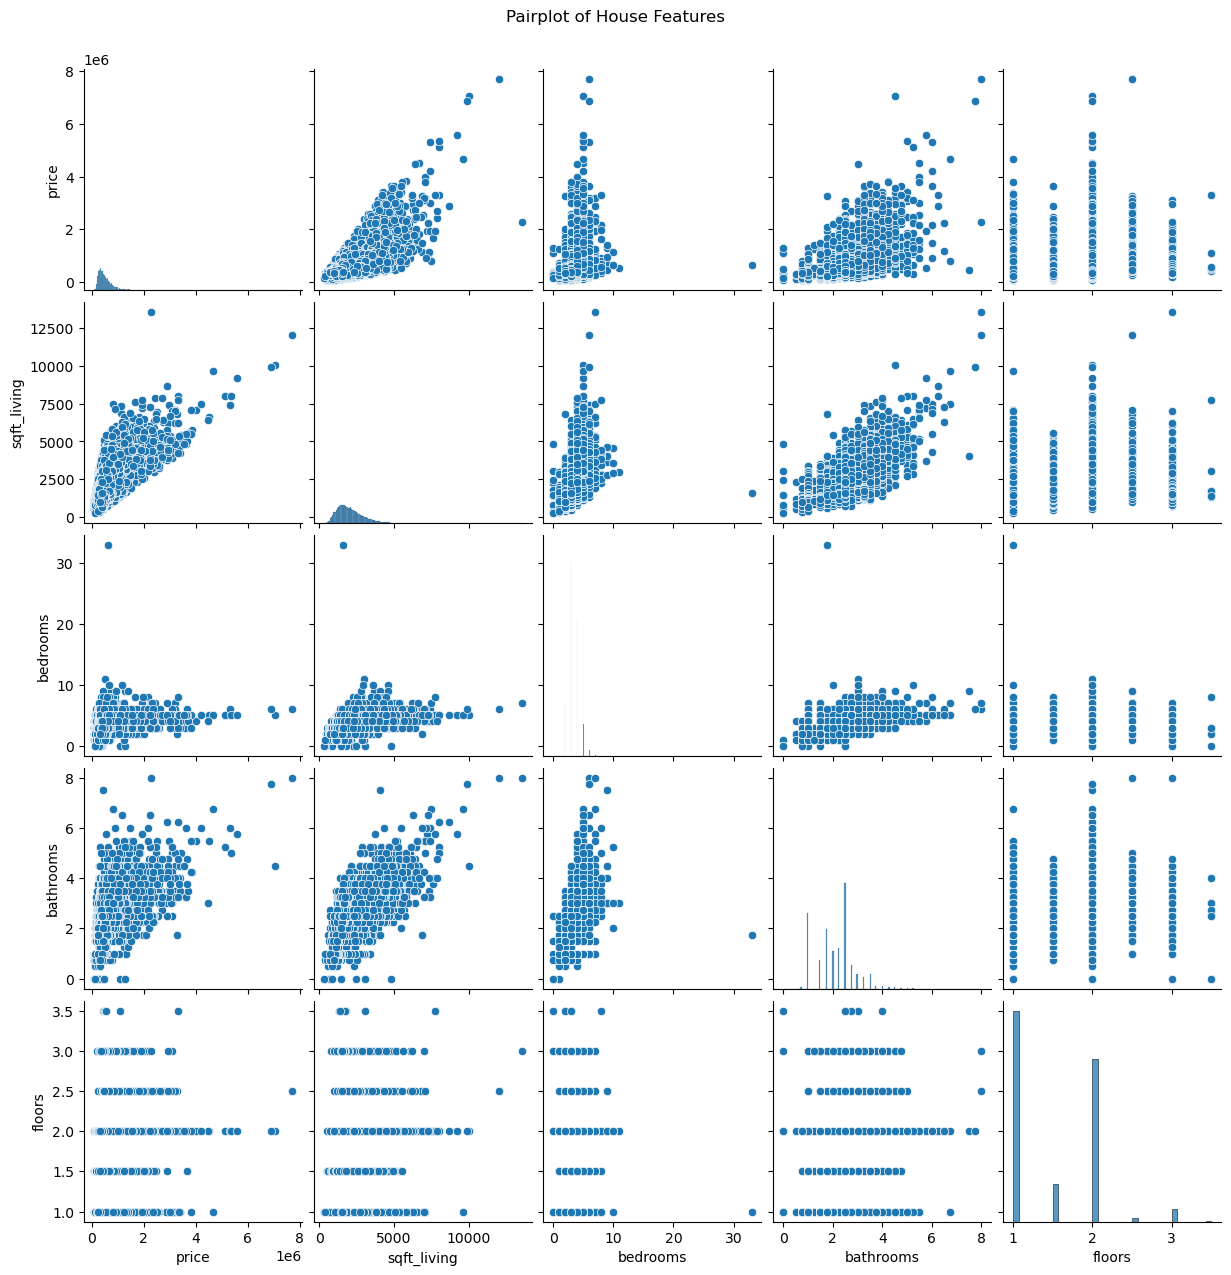

In [18]:
#pairplot
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']])
plt.suptitle("Pairplot of House Features", y=1.02)
plt.show()


The scatter plots reveal clear positive linear relationships between price and the number of bedrooms, bathrooms, and square footage. As these features increase, the price tends to rise proportionally, making them strong predictors of value.

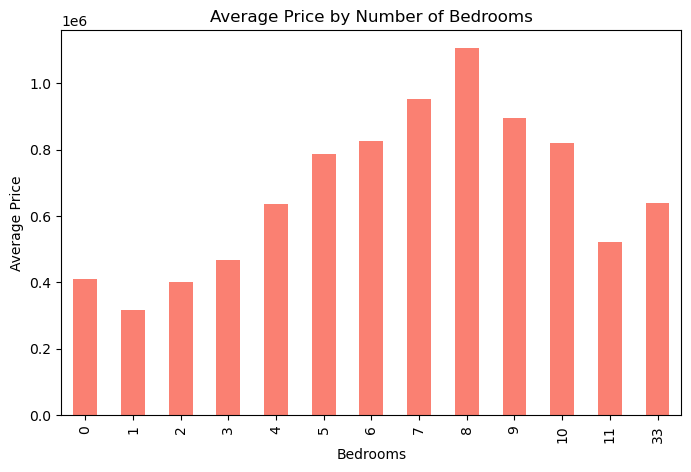

In [19]:
#bar plot
bed_avg_price = df.groupby('bedrooms')['price'].mean().sort_index()
bed_avg_price.plot(kind='bar', figsize=(8,5), color='salmon')
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.show()


 Generally, the average price increases with more bedrooms, but the trend becomes inconsistent for homes with more than eight bedrooms. This is likely due to the small number of such properties in the dataset, making them outliers.

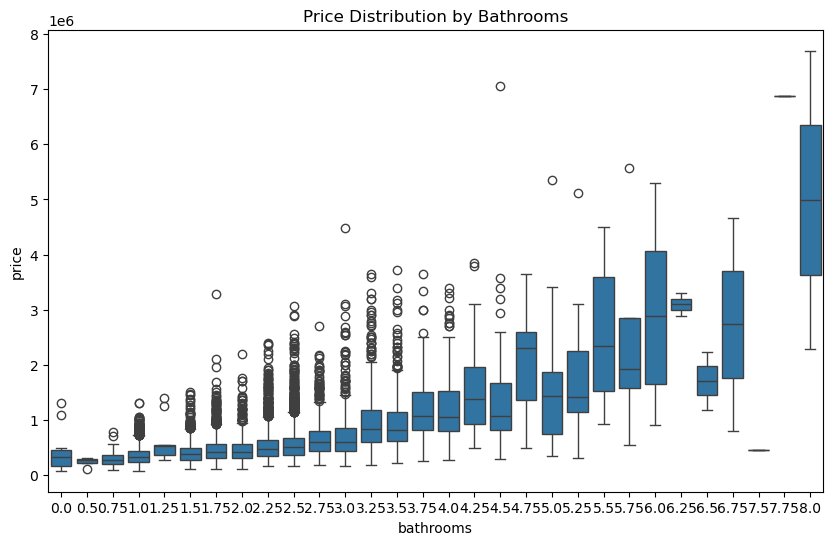

In [20]:
#box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title("Price Distribution by Bathrooms")
plt.show()


The median price and overall price range consistently increase with the number of bathrooms. This confirms that the number of bathrooms is a reliable indicator of a house's price tier.

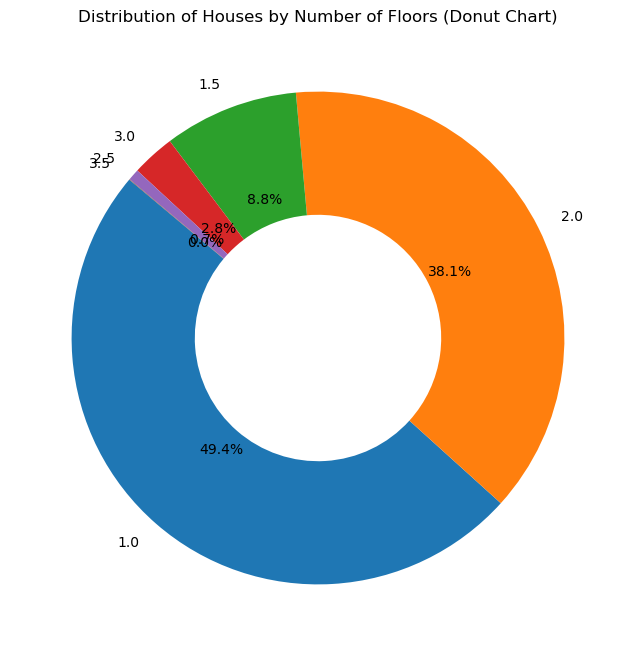

In [21]:
#donut chart
floor_counts = df['floors'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.5})
plt.title("Distribution of Houses by Number of Floors (Donut Chart)")
plt.show()


The housing stock is dominated by one and two-story homes, which together make up over 85% of the properties sold. This shows the typical home structure in the King County area during this period.

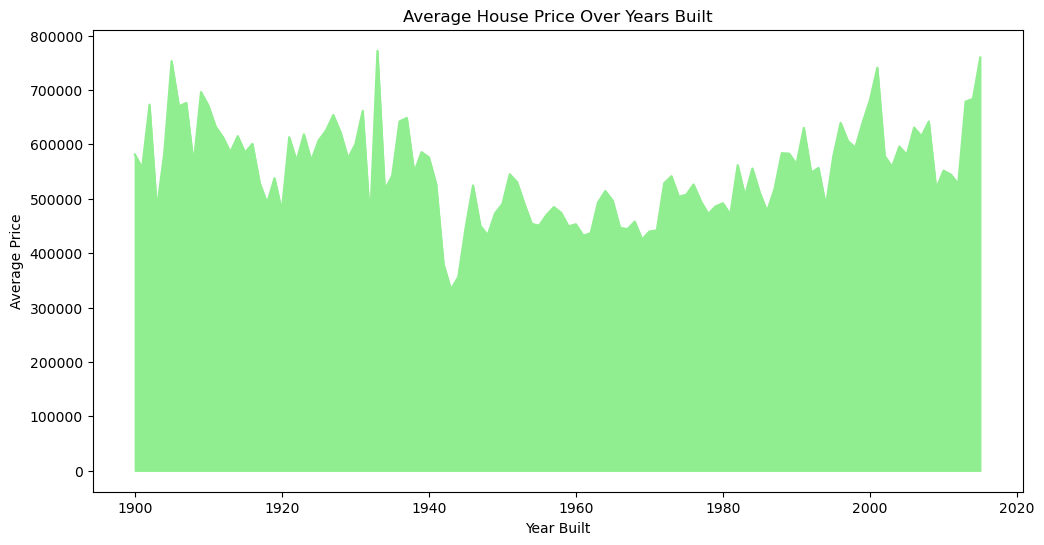

In [22]:
#area plot
yearly_price = df.groupby('yr_built')['price'].mean()
plt.figure(figsize=(12,6))
yearly_price.plot(kind='area', color='lightgreen')
plt.title("Average House Price Over Years Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.show()


Newer houses are, on average, more expensive. The steady upward trend in price for homes built after the 1940s suggests that modern construction and amenities are highly valued in the market.



C:\Users\samar\AppData\Local\Temp\ipykernel_18296\205178141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='waterfront', data=df, palette='pastel')


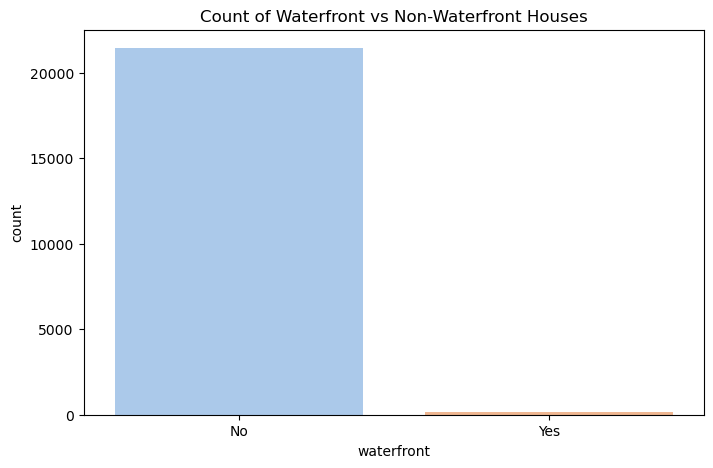

In [23]:
#countplot 
plt.figure(figsize=(8,5))
sns.countplot(x='waterfront', data=df, palette='pastel')
plt.title("Count of Waterfront vs Non-Waterfront Houses")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


There is a significant imbalance in the dataset, with very few homes having a waterfront view. This rarity makes waterfront access a premium and highly influential feature on house price.

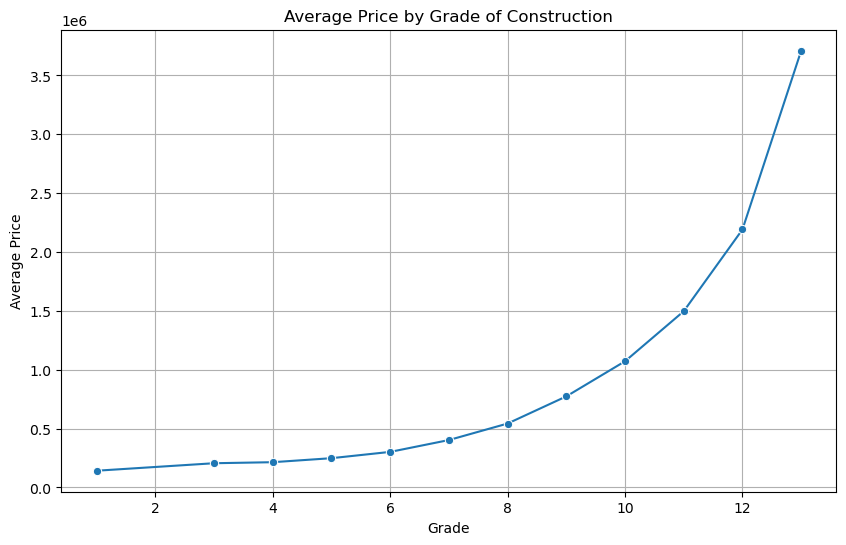

In [24]:
#line chart 
grade_price = df.groupby('grade')['price'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=grade_price.index, y=grade_price.values, marker='o', linestyle='-')
plt.title("Average Price by Grade of Construction")
plt.xlabel("Grade")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()


This chart shows a strong, positive, and exponential relationship between the construction grade and the average price. The price increases with each grade level, and the rate of increase becomes much steeper for higher grades (11-13). This indicates that construction quality is a powerful predictor of price, with improvements in high-end homes adding significantly more value than similar-level improvements in lower-end homes.

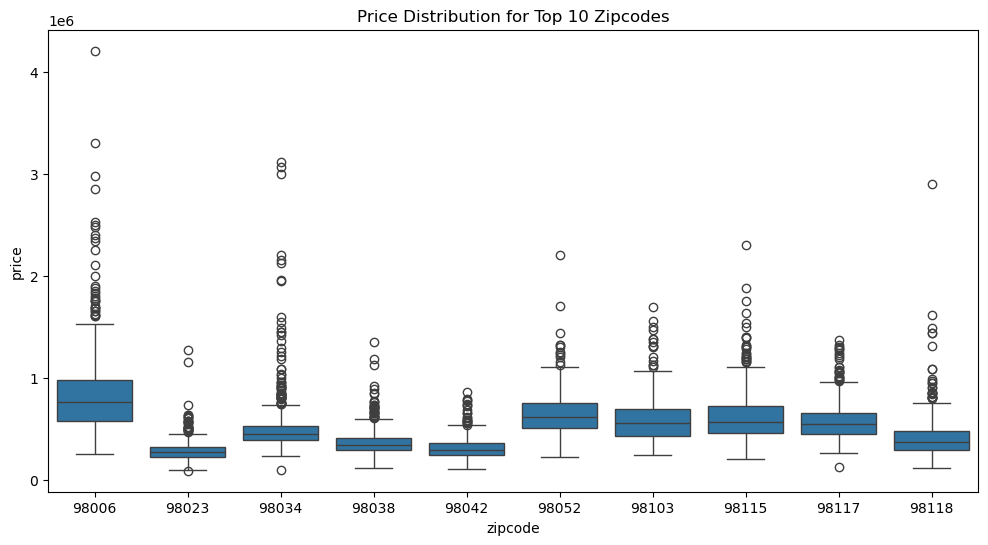

In [25]:
#box plot 
top_zip = df['zipcode'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='zipcode', y='price', data=df[df['zipcode'].isin(top_zip)])
plt.title("Price Distribution for Top 10 Zipcodes")
plt.show()


Location is a critical factor, as there is substantial variation in median prices and price ranges across the top 10 zip codes. Certain zip codes clearly represent more affluent neighborhoods with higher property values.

Machine Learning Model Section

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)



In [5]:
# Step 2: Load Dataset
df = pd.read_csv("C:\\Daily drive\\College\\sem 5\\piyush_sir_ai_&_ml\\MAIN PROJECTS\\200 marks ml\\kc_house_data.csv")
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# Step 3: Feature Engineering
# Create a binary target: 1 if the price is above median, else 0
df['expensive'] = (df['price'] > df['price'].median()).astype(int)


In [7]:
# Step 4: Drop unused or redundant columns
X = df.drop(columns=['id', 'date', 'price', 'expensive'])
y = df['expensive']

In [8]:
# Step 5: Handle missing values
X = X.fillna(X.mean())

In [13]:
# Step 6: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\samar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)


In [16]:
# Step 9: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

Confusion Matrix:
 [[1765  371]
 [ 497 1690]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      2136
           1       0.82      0.77      0.80      2187

    accuracy                           0.80      4323
   macro avg       0.80      0.80      0.80      4323
weighted avg       0.80      0.80      0.80      4323

Accuracy: 0.799
Precision: 0.82
Recall: 0.773
F1 Score: 0.796


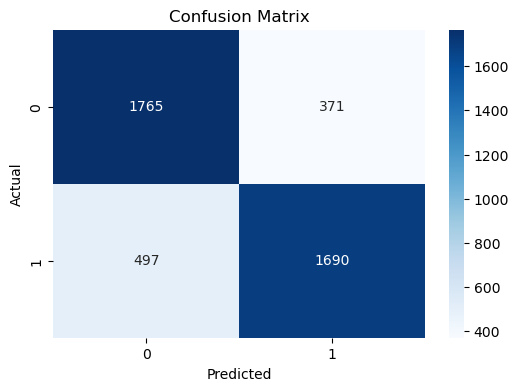

In [ ]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

The logistic regression model built to classify houses as “expensive” or “not expensive” demonstrated the practical steps of a supervised machine learning workflow, including data preparation, feature engineering, and model evaluation. Key learnings from this project include:

- **Effective feature engineering** is crucial: Creating a binary target variable based on the median price allowed for a clear and interpretable classification problem.
- **Robust data preprocessing** such as handling missing values and removing irrelevant features improved model training and reliability.
- **Model performance** can be constrained by input features and data scaling: The convergence warning suggests that further improvements—such as feature scaling or regularization—could enhance model training and accuracy.

Overall, the model successfully separated properties above and below the median price, providing a usable, interpretable classifier. Future iterations could further optimize predictive performance by addressing convergence issues, incorporating additional features, or experimenting with other classification algorithms. This approach demonstrates a solid foundation for data-driven decision-making in real estate analytics.